In [1]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from torch.utils.data import DataLoader
from torch.utils.data import TensorDataset
import torch.nn as nn
import numpy as np
import torch

In [2]:
x=np.linspace(-2*np.pi,2*np.pi,400)
y=np.sin(x)*2 + np.sin(2*x)
# 将数据做成数据集的模样
X=np.expand_dims(x,axis=1)
Y=y.reshape(400,-1)
# 使用批训练方式
dataset=TensorDataset(torch.tensor(X,dtype=torch.float),torch.tensor(Y,dtype=torch.float))
dataloader=DataLoader(dataset,batch_size=100,shuffle=True)

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.net=nn.Sequential(
            nn.Linear(in_features=1,out_features=10),nn.ReLU(),
            nn.Linear(10,100),nn.ReLU(),
            nn.Linear(100,10),nn.ReLU(),
            nn.Linear(10,1)
        )

    def forward(self, input:torch.FloatTensor):
        return self.net(input)

In [5]:
net=Net()
# 定义优化器和损失函数 学习率0.001
optim=torch.optim.Adam(Net.parameters(net),lr=0.001)
Loss=nn.MSELoss()
for epoch in range(3000):
    loss=None
    for batch_x,batch_y in dataloader:
        y_predict=net(batch_x)
        loss=Loss(y_predict,batch_y)
        optim.zero_grad()
        loss.backward()
        optim.step()
    # 每100次 的时候打印一次日志
    if (epoch+1)%100==0:
        print("step: {0} , loss: {1}".format(epoch+1,loss.item()))

step: 100 , loss: 0.32350417971611023
step: 200 , loss: 0.1872817575931549
step: 300 , loss: 0.2680923044681549
step: 400 , loss: 0.3586548864841461
step: 500 , loss: 0.20949995517730713
step: 600 , loss: 0.285740464925766
step: 700 , loss: 0.15657201409339905
step: 800 , loss: 0.14213795959949493
step: 900 , loss: 0.15215365588665009
step: 1000 , loss: 0.13620030879974365
step: 1100 , loss: 0.09225461632013321
step: 1200 , loss: 0.06035152077674866
step: 1300 , loss: 0.04525972530245781
step: 1400 , loss: 0.041532061994075775
step: 1500 , loss: 0.02622954174876213
step: 1600 , loss: 0.015241549350321293
step: 1700 , loss: 0.019530368968844414
step: 1800 , loss: 0.014063370414078236
step: 1900 , loss: 0.010123073123395443
step: 2000 , loss: 0.00516984099522233
step: 2100 , loss: 0.004484002944082022
step: 2200 , loss: 0.0030915532261133194
step: 2300 , loss: 0.005456215236335993
step: 2400 , loss: 0.0038653539959341288
step: 2500 , loss: 0.0030236211605370045
step: 2600 , loss: 0.00266

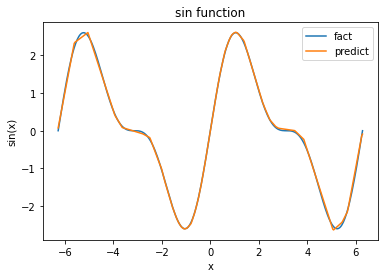

In [6]:
# 使用训练好的模型进行预测
predict=net(torch.tensor(X,dtype=torch.float))

# 绘图展示预测的和真实数据之间的差异
import matplotlib.pyplot as plt
plt.plot(x,y,label="fact")
plt.plot(x,predict.detach().numpy(),label="predict")
plt.title("sin function")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.savefig(fname="result.png")
plt.show()